'''
=================================================


Milestone 1

Nama  : Dery Rai Ambhara
Batch : RMT 034

Program ini dibuat untuk Menganalisa Persebaran Gaji pekerja dibidang data didunia


=================================================

'''

# Dashboard


https://public.tableau.com/views/Milestone1_17225141815060/Dashboard1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

# SMART FRAMEWORK

Specific: Identifikasi faktor-faktor utama yang mempengaruhi gaji pekerja di bidang data di seluruh dunia

Measurable: Ukur keberhasilan dengan tingkat signifikansi statistik p Value <0.05 , untuk menentukan pekerjaan berdasarkan gaji

Achievable: Ini dapat dicapai dengan menggunakan dataset yang tepat,analisis yang tepat

Relevant:Penting bagi pekerja data untuk memilih pekerjaan yang diinginkan berdasarkan gaji yang diharapkan

Time Bound : Q1 2025

# PROBLEM STATEMENT

Menganalisis faktor-faktor utama yang mempengaruhi gaji pekerja di bidang data di dunia untuk membantu dalam menentukan pekerjaan yang akan diambil berdasarkan struktur gaji yang diharapkan. data akan diukur dengan menemukan variabel-variabel yang signifikan (p-value < 0.05) dalam mempengaruhi gaji, dan hasil analisis ini akan diselesaikan dan tersedia untuk pekerja data pada Q1 2025.

# PENJABARAN MASALAH BERDASARKAN PROBLEM STATEMENT

1. Dimanakah negara yang memiliki rata rata penghasilan yang tinggi sebagai pekerja data 

2. Apakah tingkat pengalaman kerja dan mempengaruhi penghasilan 

3. Pekerjaan apa yang penghasilannya paling tinggi 

4. Bagaimana  rata rata gaji antar benua di tiap perusahaan

5. Pada tahun berapa rata rata penghasilan paling tinggi 

6. Pengaruh kapasitas company terhadap gaji 

7. Analisa Rata Rata penghasilan secara keseluruhan

In [237]:
import pandas as pd #mengimport dataset yang didapat dari kaggle
import matplotlib.pyplot as plt # untuk visualiasi
from scipy import stats #untuk statistik
import seaborn as sns #visualisasi scatter plot
df = pd.read_csv('ds_salaries.csv')
'Source: https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries'

In [238]:
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


# Data Cleaning

In [239]:
df.isna().sum() #pengecekan missing value

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Tidak adanya mising value pada tiap kolom

In [240]:
df.columns #pengecekan nama nama kolom

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

Adanya kolom yang tidak diinginkan yaitu unnamed :0 maka harus dilakukan handling pada kolom tersebut

## Handling coloumns Unnamed

In [241]:
df.drop(columns=['Unnamed: 0'], inplace=True) #drop kolom unnamed yang tidak mengartikan apa apa+
df.drop(columns=['salary'], inplace=True) #kolom tidak digunakan sebagai pengambilan data


In [242]:
df.columns # pengecekan kembali kolom

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

kolom yang didapat setelah melakukan handling sesuai yang diharapkan dan semua nama kolom berguna untuk pengolahan data nantinya

------------------------------------------------------------------------

## Cek informasi umum 

In [243]:
df.info() #pengecekan informasi umum pada dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_currency     607 non-null    object
 5   salary_in_usd       607 non-null    int64 
 6   employee_residence  607 non-null    object
 7   remote_ratio        607 non-null    int64 
 8   company_location    607 non-null    object
 9   company_size        607 non-null    object
dtypes: int64(3), object(7)
memory usage: 47.6+ KB


Terdapat 607 data yang berhasil didapatkan

berisi 11 kolom yang menjelaskan 

Tidak adanya Missing Value dari data yang didapatkan

Tipe data yang tidak sesuai ada di kolom salary_in_usd dan salary yang harusnya float tapi didapatkan integer
maka datatype yang didapat akan dilakukan handling terlebih dahulu

## Penggantian type data

In [244]:
#penggantian type data pada salary_in_usd menjadi float
df['salary_in_usd'] = df['salary_in_usd'].astype(float)

tipedata dari kolom salary in usd berhasil diubah menjadi float

## Pengecekan unique value dan handlingnya

Mencari tahu data yang berbeda beda atau ada yang sama tetapi menggunakan singkatan dan mengetahui negara negara yang nantinya akan dirubah menjadi nama lengkap

In [245]:
a= df['job_title'].unique() #pengecekan unique value pada kolom jobtitle dan company location
b= df['company_location'].unique()
print(a)
print(b)

['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer'
 'Machine Learning Developer' 'Applied Machine Learning Scientist'
 'Data Analytics Manager' 'Head of Data Science' 'Data Specialist'
 'Data Architect' 'Finance Data Anal

hasilnya ada data pekerjaan yang sama tetapi menggunakan singkatan

dan

Hasilnya negara masih dalamm bentuk 2 kode huruf dan ada 

Setelah data yang didapat diatas terdapat ML engineer yang artinya sama dengan Machine Learning Engineer, keberadaan ML engineer jika tidak dihandling dapat memberikan hasil yang beda dengan Machine Learning Engineer walaupun pekerjaannya sama 

In [246]:
df['job_title'] = df['job_title'].str.replace('ML', 'Machine Learning') #code ini berguna untuk mengganti kata ML yang asalnya singkatan diperjelas menjadi Machine Learning

In [247]:
df['job_title'].unique() #Pengecekan unqiue value yang sudah dihandling

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'AI Scientist',
       'Computer Vision Engineer', 'Principal Data Scientist',
       'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       'Applied Machin

Data ML engineer berhasil diubah menjadi Machine Learning Engineer

### Pengelompokan Pekerjaan menjadi Data science,Data engineer, dan Data Analyst

In [248]:
# Kategorisasi
categories = []

for job in df['job_title']:
    lower_job = job.lower()
    if 'engineer' in lower_job:
        if 'analyst' in lower_job or 'analytics' in lower_job:
            categories.append('Data Analyst')
        else:
            categories.append('Data Engineer')
    elif 'analyst' in lower_job or 'analytics' in lower_job:
        categories.append('Data Analyst')
    elif 'scientist' in lower_job or 'science' in lower_job:
        categories.append('Data Scientist')
    else:
        categories.append('Data Engineer')

# Menambahkan kolom kategori ke DataFrame yang sudah ada
df['Pekerjaan'] = categories



In [249]:
df #pengecekan dataframe baru dengan penambahan kolom Pekerjaan

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Pekerjaan
0,2020,MI,FT,Data Scientist,EUR,79833.0,DE,0,DE,L,Data Scientist
1,2020,SE,FT,Machine Learning Scientist,USD,260000.0,JP,0,JP,S,Data Scientist
2,2020,SE,FT,Big Data Engineer,GBP,109024.0,GB,50,GB,M,Data Engineer
3,2020,MI,FT,Product Data Analyst,USD,20000.0,HN,0,HN,S,Data Analyst
4,2020,SE,FT,Machine Learning Engineer,USD,150000.0,US,50,US,L,Data Engineer
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,USD,154000.0,US,100,US,M,Data Engineer
603,2022,SE,FT,Data Engineer,USD,126000.0,US,100,US,M,Data Engineer
604,2022,SE,FT,Data Analyst,USD,129000.0,US,0,US,M,Data Analyst
605,2022,SE,FT,Data Analyst,USD,150000.0,US,100,US,M,Data Analyst


Kemudian perubahan nama negara yang asalnya 2 kode negara menjadi nama negara yang lengkap yang bertujuan untuk data terbaca pada saat visualisasi mapping

In [250]:
country= {
    'DE': 'Germany', 'JP': 'Japan', 'GB': 'United Kingdom', 'HN': 'Honduras', 
    'US': 'United States', 'HU': 'Hungary', 'NZ': 'New Zealand', 'FR': 'France', 
    'IN': 'India', 'PK': 'Pakistan', 'CN': 'China', 'GR': 'Greece', 'AE': 'United Arab Emirates', 
    'NL': 'Netherlands', 'MX': 'Mexico', 'CA': 'Canada', 'AT': 'Austria', 'NG': 'Nigeria', 
    'ES': 'Spain', 'PT': 'Portugal', 'DK': 'Denmark', 'IT': 'Italy', 'HR': 'Croatia', 
    'LU': 'Luxembourg', 'PL': 'Poland', 'SG': 'Singapore', 'RO': 'Romania', 'IQ': 'Iraq', 
    'BR': 'Brazil', 'BE': 'Belgium', 'UA': 'Ukraine', 'IL': 'Israel', 'RU': 'Russia', 
    'MT': 'Malta', 'CL': 'Chile', 'IR': 'Iran', 'CO': 'Colombia', 'MD': 'Moldova', 
    'KE': 'Kenya', 'SI': 'Slovenia', 'CH': 'Switzerland', 'VN': 'Vietnam', 'AS': 'American Samoa', 
    'TR': 'Turkey', 'CZ': 'Czech Republic', 'DZ': 'Algeria', 'EE': 'Estonia', 
    'MY': 'Malaysia', 'AU': 'Australia', 'IE': 'Ireland'
}

df['company_location'] = df['company_location'].replace(country)
#code untuk penggantian singkatan negara menjadi nama lengkap sebuah negara

In [251]:
df['company_location'].unique() # pengecekan nama negara setelah dihandling

array(['Germany', 'Japan', 'United Kingdom', 'Honduras', 'United States',
       'Hungary', 'New Zealand', 'France', 'India', 'Pakistan', 'China',
       'Greece', 'United Arab Emirates', 'Netherlands', 'Mexico',
       'Canada', 'Austria', 'Nigeria', 'Spain', 'Portugal', 'Denmark',
       'Italy', 'Croatia', 'Luxembourg', 'Poland', 'Singapore', 'Romania',
       'Iraq', 'Brazil', 'Belgium', 'Ukraine', 'Israel', 'Russia',
       'Malta', 'Chile', 'Iran', 'Colombia', 'Moldova', 'Kenya',
       'Slovenia', 'Switzerland', 'Vietnam', 'American Samoa', 'Turkey',
       'Czech Republic', 'Algeria', 'Estonia', 'Malaysia', 'Australia',
       'Ireland'], dtype=object)

In [252]:
# List negara berdasarkan benua
europe = ['Germany', 'Ireland', 'Estonia', 'Czech Republic', 'Switzerland', 
          'Slovenia', 'Moldova', 'Malta', 'Russia', 'United Kingdom', 'Hungary', 
          'France', 'Spain', 'Austria', 'Ukraine', 'Belgium', 'Romania', 'Poland', 
          'Luxembourg', 'Croatia', 'Italy', 'Portugal', 'Denmark','Greece','Netherlands']
asia = ['Japan', 'Turkey', 'New Zealand', 'Australia', 'Malaysia', 
        'Vietnam', 'Iran', 'Israel', 'Singapore', 'United Arab Emirates', 
        'China', 'Pakistan', 'India','Iraq']
afrika = ['Nigeria', 'Algeria', 'Kenya']
amerika = ['United States', 'Mexico', 'Canada', 'Honduras', 'Brazil', 'Chile', 
            'Colombia']

# kategorisasi berdasarkan benua
continent = []

for location in df['company_location']:
    lower_location = location.lower()
    
    if any(country.lower() in lower_location for country in europe):
        continent.append('Eropa')
    elif any(country.lower() in lower_location for country in asia):
        continent.append('Asia')
    elif any(country.lower() in lower_location for country in afrika):
        continent.append('Afrika')
    elif any(country.lower() in lower_location for country in amerika):
        continent.append('Amerika')
    else:
        continent.append('Other')  #selain 4 benua diatas dimasukan ke others

# Add the continent column to the DataFrame
df['Benua'] = continent


Nama nama negara sudah sesuai untuk tujuan visualisasi mapping nantinya

In [253]:
df #pengecekan dataframe sebelum dianalisa lebih lanjut sudah sesuai dengan yang diinginkan atau belum

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Pekerjaan,Benua
0,2020,MI,FT,Data Scientist,EUR,79833.0,DE,0,Germany,L,Data Scientist,Eropa
1,2020,SE,FT,Machine Learning Scientist,USD,260000.0,JP,0,Japan,S,Data Scientist,Asia
2,2020,SE,FT,Big Data Engineer,GBP,109024.0,GB,50,United Kingdom,M,Data Engineer,Eropa
3,2020,MI,FT,Product Data Analyst,USD,20000.0,HN,0,Honduras,S,Data Analyst,Amerika
4,2020,SE,FT,Machine Learning Engineer,USD,150000.0,US,50,United States,L,Data Engineer,Amerika
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,USD,154000.0,US,100,United States,M,Data Engineer,Amerika
603,2022,SE,FT,Data Engineer,USD,126000.0,US,100,United States,M,Data Engineer,Amerika
604,2022,SE,FT,Data Analyst,USD,129000.0,US,0,United States,M,Data Analyst,Amerika
605,2022,SE,FT,Data Analyst,USD,150000.0,US,100,United States,M,Data Analyst,Amerika


In [254]:
df['Benua'].unique() #mengecek unique valu yang ada di kolom tersebut

array(['Eropa', 'Asia', 'Amerika', 'Afrika', 'Other'], dtype=object)

In [255]:
#mengecek unique valu yang ada di kolom tersebut
df['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

Singkatan diubah menjadi nama panjang

In [256]:
employment= {
    'FT': 'FullTime', 'CT': 'Contract', 'PT': 'PartTime', 'FL': 'FreeLance'
}

df['employment_type'] = df['employment_type'].replace(employment) #mengganti singkatan menjadi nama jelas

In [257]:
#mengecek kembali kolom yang sudah dihandling
df['employment_type'].unique()

array(['FullTime', 'Contract', 'PartTime', 'FreeLance'], dtype=object)

Pemberitahuan informasi melalui unique value pada singkatan yang ada di kolom experience level

In [258]:
df['experience_level'].unique() #mengecek unique valu yang ada di kolom tersebut

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

Singkatan diubah menjadi nama panjang

In [259]:
experience= {
    'MI': 'Mid-Level', 'SE': 'Senior-Level', 'EN': 'Entry-Level', 'EX': 'Expert-Level'
}

df['experience_level'] = df['experience_level'].replace(experience) #mengganti singkatan menjadi nama jelas

In [260]:
#mengecek kembali kolom yang sudah dihandling
df['experience_level'].unique()

array(['Mid-Level', 'Senior-Level', 'Entry-Level', 'Expert-Level'],
      dtype=object)

In [261]:
df['company_size'].unique() #mengecek unique valu yang ada di kolom tersebut

array(['L', 'S', 'M'], dtype=object)

Singkatan diubah menjadi nama panjang

In [262]:
company= {
    'S': 'Small', 'M': 'Medium', 'L': 'Large',
}

df['company_size'] = df['company_size'].replace(company) #mengganti singkatan menjadi nama jelas

In [263]:
 #mengecek unique valu yang ada di kolom tersebut
df['company_size'].unique() 

array(['Large', 'Small', 'Medium'], dtype=object)

In [264]:
df #Pengecekan kembali dataframe sebelum dianalisa

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Pekerjaan,Benua
0,2020,Mid-Level,FullTime,Data Scientist,EUR,79833.0,DE,0,Germany,Large,Data Scientist,Eropa
1,2020,Senior-Level,FullTime,Machine Learning Scientist,USD,260000.0,JP,0,Japan,Small,Data Scientist,Asia
2,2020,Senior-Level,FullTime,Big Data Engineer,GBP,109024.0,GB,50,United Kingdom,Medium,Data Engineer,Eropa
3,2020,Mid-Level,FullTime,Product Data Analyst,USD,20000.0,HN,0,Honduras,Small,Data Analyst,Amerika
4,2020,Senior-Level,FullTime,Machine Learning Engineer,USD,150000.0,US,50,United States,Large,Data Engineer,Amerika
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior-Level,FullTime,Data Engineer,USD,154000.0,US,100,United States,Medium,Data Engineer,Amerika
603,2022,Senior-Level,FullTime,Data Engineer,USD,126000.0,US,100,United States,Medium,Data Engineer,Amerika
604,2022,Senior-Level,FullTime,Data Analyst,USD,129000.0,US,0,United States,Medium,Data Analyst,Amerika
605,2022,Senior-Level,FullTime,Data Analyst,USD,150000.0,US,100,United States,Medium,Data Analyst,Amerika


Data Cleaning Sudah selesai dilakukan sesuai kebutuhan analisa data

In [281]:
df.to_csv("clean_datasalary.csv")

# Analisa

## 1. Dimanakah negara yang memiliki rata rata penghasilan yang tinggi sebagai pekerja data

In [266]:
avg_salary = df[['company_location', 'salary_in_usd']].groupby(['company_location']).mean().reset_index() #menjumlahkan gaji data berdasarkan tempat kerjanya

# Mengurutkan hasil berdasarkan 'salary_in_usd' dalam urutan menurun
sorted_avg_salary = avg_salary.sort_values(by='salary_in_usd', ascending=False)

sorted_avg_salary

,company_location,salary_in_usd
39,Russia,157500.000000
48,United States,144055.261972
33,New Zealand,125000.000000
23,Israel,119059.000000
25,Japan,114127.333333
2,Australia,108042.666667
21,Iraq,100000.000000
46,United Arab Emirates,100000.000000
0,Algeria,100000.000000
6,Canada,99823.733333


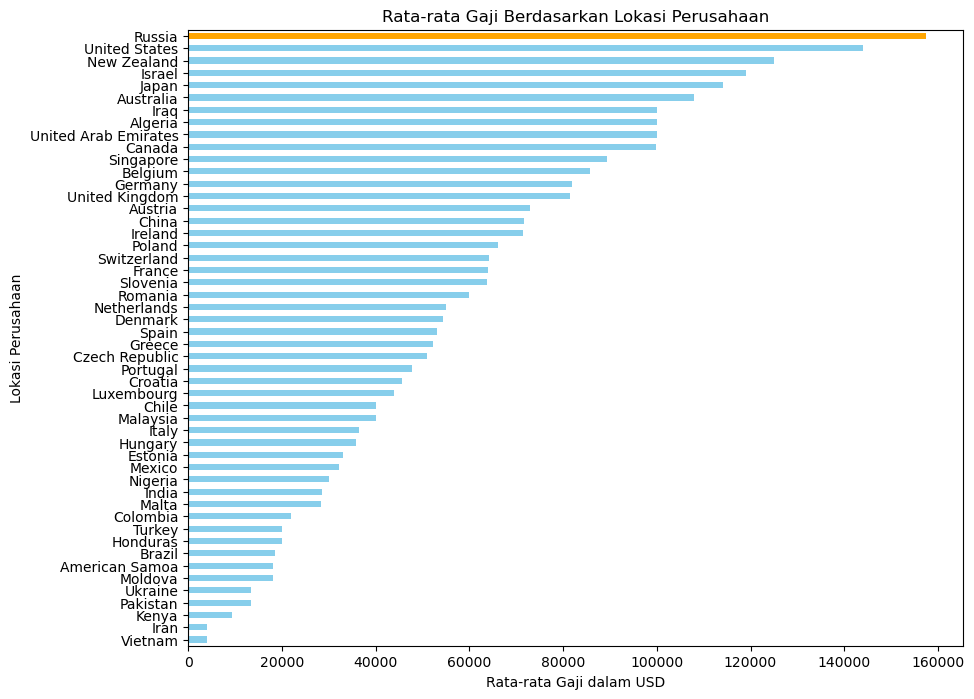

In [267]:

# Mengelompokkan data berdasarkan 'company_location' dan menghitung rata-rata gaji,
# lalu mengurutkan berdasarkan rata-rata gaji tersebut
rata_rata_gaji_per_lokasi = df.groupby('company_location')['salary_in_usd'].mean().sort_values()

# Mendapatkan lokasi dengan rata-rata gaji tertinggi
lokasi_gaji_tertinggi = rata_rata_gaji_per_lokasi.idxmax()

# Mendefinisikan warna: gunakan satu warna untuk semua bar dan warna lain untuk gaji tertinggi
warna = ['skyblue' if lokasi != lokasi_gaji_tertinggi else 'orange' for lokasi in rata_rata_gaji_per_lokasi.index]

# Membuat plot bar horizontal dengan rata-rata gaji yang diurutkan
rata_rata_gaji_per_lokasi.plot(kind='barh', figsize=(10, 8), color=warna)

# Menambahkan label dan judul untuk kejelasan
plt.xlabel('Rata-rata Gaji dalam USD')
plt.ylabel('Lokasi Perusahaan')
plt.title('Rata-rata Gaji Berdasarkan Lokasi Perusahaan')
plt.show()


Dari hasil yang didapat rata rata tertinggi lokasi pekerjaan disebuah negara berada di Rusia mendapatkan rata rata penghasilan tertinggi sebesar $157500, direkomendasikan kepada para pekerja yang ingin mendapatkan penghasilan yang tinggi untuk bekerja di perusahaan yang berlokasi di rusia

## 2. Apakah tingkat pengalaman kerja mempengaruhi penghasilan

In [268]:

average_salary_exp = df[['experience_level', 'salary_in_usd']].groupby(['experience_level']).mean().reset_index() #memngelompokan data berdasarkan pekerjaan dan tingkatan level kerjanya

# Mengurutkan hasil berdasarkan 'salary_in_usd' dalam urutan menurun
sorted_average_salary_exp = average_salary_exp.sort_values(by='salary_in_usd', ascending=False)

sorted_average_salary_exp

,experience_level,salary_in_usd
1,Expert-Level,199392.038462
3,Senior-Level,138617.292857
2,Mid-Level,87996.056338
0,Entry-Level,61643.318182


H0: Rata Rata penghasilan di tiap level tingkatan sama

H1: Rata-rata penghasilan di tiap level tingkatan berbeda 

In [269]:
EX = df[df['experience_level']=='Expert-Level'][['work_year','salary_in_usd']].groupby(['work_year']).mean()
EN = df[df['experience_level']=='Entry-Level'][['work_year','salary_in_usd']].groupby(['work_year']).mean()
SE = df[df['experience_level']=='Senior-Level'][['work_year','salary_in_usd']].groupby(['work_year']).mean()
MI = df[df['experience_level']=='Mid-Level'][['work_year','salary_in_usd']].groupby(['work_year']).mean()

In [270]:
res = stats.f_oneway(EX,EN,SE,MI)
print('P-value:',res.pvalue)

P-value: [3.58215021e-06]


p-value < 5% (critical value) berhasil di tolak H0 maka H1 diterima yang artinya Rata-rata penghasilan di tiap level tingkatan berbeda maka dari itu tingkatan level berpengaruh pada penghasilan pekerja semakin tinggi tingkat pekerjaan semakin tinggi pendapatan

## 3. Pekerjaan apa yang penghasilannya paling tinggi

In [271]:

average_salary = df[['Pekerjaan', 'salary_in_usd']].groupby(['Pekerjaan']).mean().reset_index() #memngelompokan data berdasarkan pekerjaan dan tempat kerjanya

# Mengurutkan hasil berdasarkan 'salary_in_usd' dalam urutan menurun
sorted_average_salary = average_salary.sort_values(by='salary_in_usd', ascending=False)

sorted_average_salary

,Pekerjaan,salary_in_usd
2,Data Scientist,119140.705357
1,Data Engineer,113436.721774
0,Data Analyst,98851.718519


<Axes: xlabel='Pekerjaan'>

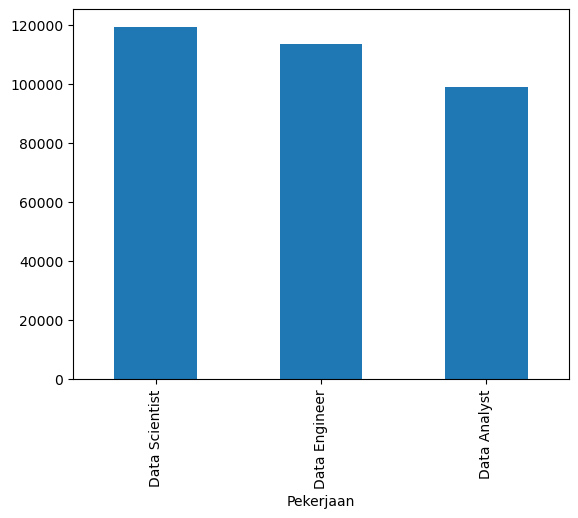

In [272]:
df.groupby(['Pekerjaan'])['salary_in_usd'].mean().sort_values(ascending=False).plot(kind='bar') #visualisasi dengan plot bar

Dari hasil yang didapat rata rata tertinggi sebuah pekerjaan yang sudah dikelompokna data scientist memiliki rata rata yang paling tinggi,jadi direkomendasikan jika ingin mendapatkan penghasilan yang tinggi maka data scientist menjadi opsi pertama dalam pemilihan pekerjaan

## 4. Bagaimana  rata rata gaji antar benua di tiap perusahaan

In [282]:
avg_salary = df[['Benua', 'salary_in_usd']].groupby(['Benua']).mean().reset_index() #menjumlahkan gaji data berdasarkan tempat kerjanya

# Mengurutkan hasil berdasarkan 'salary_in_usd' dalam urutan menurun
sorted_avg_salary = avg_salary.sort_values(by='salary_in_usd', ascending=False)

sorted_avg_salary

,Benua,salary_in_usd
1,Amerika,137990.837563
3,Eropa,69358.369427
2,Asia,53329.960784
0,Afrika,42318.000000
4,Other,18053.000000


<Axes: xlabel='Benua'>

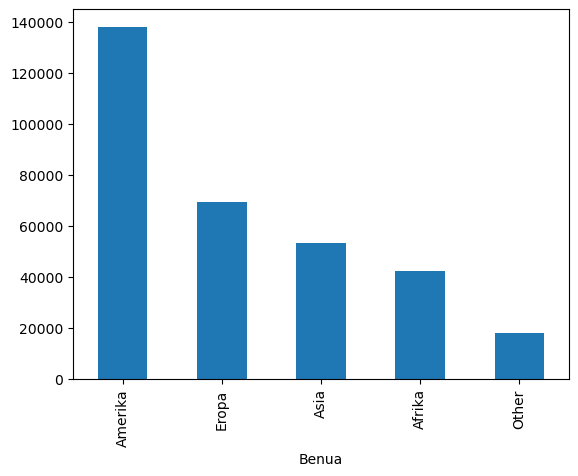

In [283]:
df.groupby(['Benua'])['salary_in_usd'].mean().sort_values(ascending=False).plot(kind='bar') 

Benua Amerika menjadi benua yang memiliki rata rata gaji pekerja data tertinggi dibanding benua yang lain dan benua eropa menjadi urutan ke 2, ini menunjukan bahwa adanya perbedaan penghasilan antara negara maju dengan negara berkembang yang mayoritas negara negara yang berada di benua eropa dan amerika merupakan negara maju sedangkan negara negara yang berada di benua afrika dan asia masih kebanyakan negara berkembang

## 5. Pada tahun berapa rata rata penghasilan paling tinggi

In [275]:
df[['work_year','salary_in_usd']].groupby(['work_year',]).mean() #untuk mencari rerata gaji dalam dollar tiap taun


,salary_in_usd
work_year,
2020,95813.000000
2021,99853.792627
2022,124522.006289


<Axes: xlabel='work_year'>

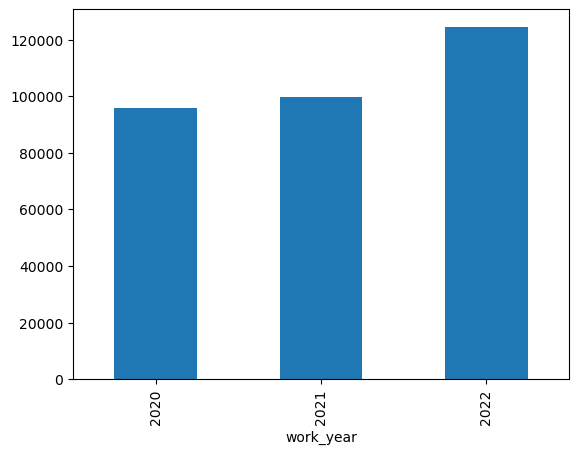

In [276]:
df.groupby(['work_year'])['salary_in_usd'].mean().plot(kind='bar')

Didapatkan rata rata gaji pekerja data di tahun 2020 yaitu $95813

 rata rata gaji pekerja data di tahun 2021 yaitu $99853

  rata rata gaji pekerja data di tahun 2022 yaitu $124522

Kenaikan gaji dari tahun 2020 hingga 2022 mengalami kenaikan walaupun pada tahun 2021 tidak begitu tinggi dikarnakan pada tahun tersebut negara negara masih dalam proses pemulihan paska covid 19, berbeda dengan pada tahun 2022 yang mengalami kenaikan drastis dalam rata rata gaji pekerjanya

'source : https://tirto.id/imf-proyeksi-inflasi-global-capai-66-persen-bagaimana-indonesia-guwb'

## 6. Pengaruh kapasitas company terhadap gaji

In [277]:
Small = df['salary_in_usd'][df['company_size']=='Small']
Medium = df['salary_in_usd'][df['company_size']=='Medium']
Large = df['salary_in_usd'][df['company_size']=='Large']


In [278]:
print(f'Rata rata gaji pada perusahaan kecil: {Small.mean():.2f}')
print(f'Rata rata gaji pada perusahaan sedang: {Medium.mean():.2f}')
print(f'Rata rata gaji pada perusahaan besar: {Large.mean():.2f}')

Rata rata gaji pada perusahaan kecil: 77632.67
Rata rata gaji pada perusahaan sedang: 116905.47
Rata rata gaji pada perusahaan besar: 119242.99


H0 = tidak adanya pengaruh signifikan antara besarnya perusahaan dengan gaji pekerjanya

H1 = Adanya pengaruh signifikan antara besarnya perusahaan dengan gaji pekerjanya

In [279]:
res = stats.f_oneway(Small,Medium,Large)
print('P-value:',res.pvalue)

P-value: 8.071991905906015e-06


P-Value<5% maka H0 ditolak H1 diterima yang artinya besarnya perusahaan berpengaruh pada gaji pekerjanya

Pekerjaan     Data Analyst  Data Engineer  Data Scientist
company_size                                             
Large                   32             78              88
Medium                  91            134             101
Small                   12             36              35


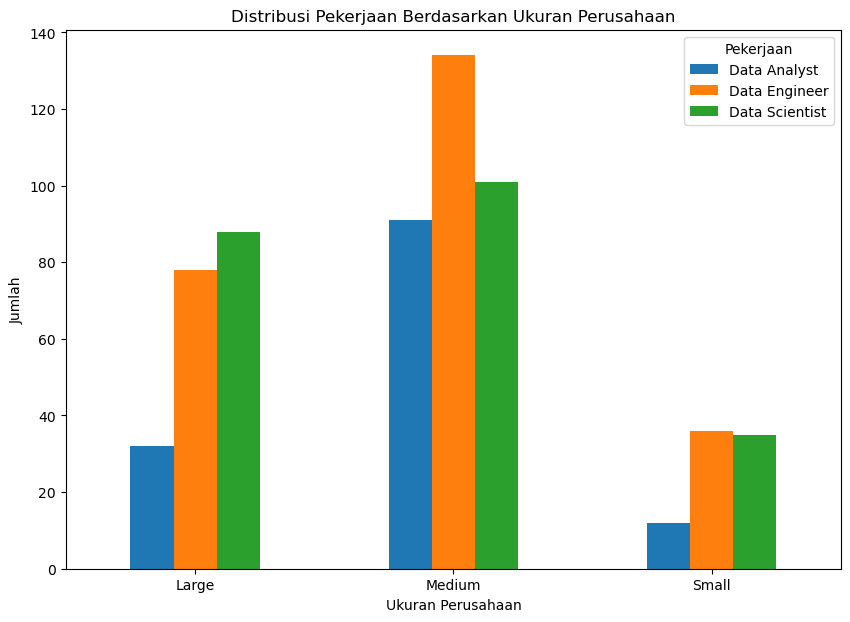

In [280]:
# Menghitung jumlah masing-masing kombinasi dari 'company_size' dan 'Pekerjaan'
jumlah_per_size_pekerjaan = df.groupby(['company_size', 'Pekerjaan']).size().unstack()

# Menampilkan hasil
print(jumlah_per_size_pekerjaan)

# Jika ingin membuat visualisasi
jumlah_per_size_pekerjaan.plot(kind='bar', stacked=False, figsize=(10, 7))
plt.ylabel('Jumlah')
plt.xlabel('Ukuran Perusahaan')
plt.title('Distribusi Pekerjaan Berdasarkan Ukuran Perusahaan')
plt.xticks(rotation=0)
plt.show()


Banyaknya Pekerjaan bedasarkan company size

## 7.Analisa Rata Rata penghasilan secara keseluruhan

In [287]:
print('salary_in_usd in Average:',df['salary_in_usd'].mean())
print('Median of salary_in_usd:',df['salary_in_usd'].median())
print('Mode of salary_in_usd:',df['salary_in_usd'].mode().values[0])
variance = df['salary_in_usd'].var()
print('Variance of salary:',variance)
std = df['salary_in_usd'].std()
print('Standard Deviation of salary:',std)

salary_in_usd in Average: 112297.86985172982
Median of salary_in_usd: 101570.0
Mode of salary_in_usd: 100000.0
Variance of salary: 5034932663.176105
Standard Deviation of salary: 70957.2594113957


Dari data data diatas berdasarkan standar deviasi rata rata penghasilan yang tersebar di negara negara,variasi data tidak tersebar secara merata dikarnakan rata rata keselurahannya berada di $1112297

# Kesimpulan

## Recap

• Dari hasil yang didapat rata rata tertinggi lokasi pekerjaan disebuah negara berada di Rusia mendapatkan rata rata penghasilan tertinggi sebesar $157500, direkomendasikan kepada para pekerja yang ingin mendapatkan penghasilan yang tinggi untuk bekerja di perusahaan yang berlokasi di rusia

•Rata-rata penghasilan di tiap level tingkatan berbeda maka dari itu tingkatan level berpengaruh pada penghasilan pekerja semakin tinggi tingkat pekerjaan semakin tinggi pendapatan

•Dari hasil yang didapat rata rata tertinggi sebuah pekerjaan yang sudah dikelompokna data scientist memiliki rata rata yang paling tinggi,jadi direkomendasikan jika ingin mendapatkan penghasilan yang tinggi maka data scientist menjadi opsi pertama dalam pemilihan pekerjaan

•Benua Amerika menjadi benua yang memiliki rata rata gaji pekerja data tertinggi dibanding benua yang lain dan benua eropa menjadi urutan ke 2, ini menunjukan bahwa adanya perbedaan penghasilan antara negara maju dengan negara berkembang yang mayoritas negara negara yang berada di benua eropa dan amerika merupakan negara maju sedangkan negara negara yang berada di benua afrika dan asia masih kebanyakan negara berkembang

•Kenaikan gaji dari tahun 2020 hingga 2022 mengalami kenaikan walaupun pada tahun 2021 tidak begitu tinggi dikarnakan pada tahun tersebut negara negara masih dalam proses pemulihan paska covid 19, berbeda dengan pada tahun 2022 yang mengalami kenaikan drastis dalam rata rata gaji pekerjanya

•besarnya perusahaan berpengaruh pada gaji pekerjanya

• variasi data tidak tersebar secara merata

## Insight

Terdapat beberapa poin yang dapat ditentukan dalam pengambilan keputusan dalam pemilihan pekerjaan yang diinginkan
•Lokasi sebuah perusahaan
•Jenis Pekerjaan
•Besar kecilnya sebuah perusahaan

## summary

Bagi mereka yang mencari gaji tinggi di bidang data, memilih pekerjaan di negara maju, terutama sebagai Data Scientist, adalah pilihan yang sangat baik. Perusahaan besar di negara maju menawarkan penghasilan yang lebih tinggi, dan tren kenaikan gaji menunjukkan adanya potensi pertumbuhan yang baik dalam beberapa tahun ke depan.